In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('data\Social_Network_Ads.csv')

In [3]:
data=pd.get_dummies(data)

In [4]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0.0,1.0
1,15810944,35.0,20000.0,0,0.0,1.0
2,15668575,26.0,43000.0,0,1.0,0.0
3,15603246,27.0,57000.0,0,1.0,0.0
4,15804002,19.0,76000.0,0,0.0,1.0


In [5]:
X=data.iloc[:,[1,2,4,5]]
y=data.iloc[:,3]

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

In [7]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("Classification Report - \n",classification_report(y_test,y_pred))
print("\n\nAccuracy Score - ",accuracy_score(y_test,y_pred))
print("\n\nConfusion Matrix - \n",confusion_matrix(y_test,y_pred))

Classification Report - 
              precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



Accuracy Score -  0.93


Confusion Matrix - 
 [[64  4]
 [ 3 29]]


In [10]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

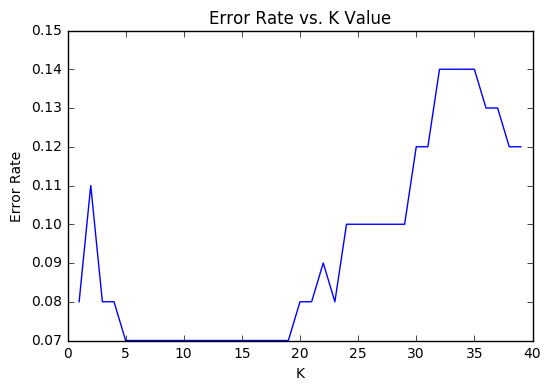

In [11]:
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')